In [1]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
adata = sc.read_visium('GSE178361_RAW/DD073R_A1_processed')
adata.var_names_make_unique

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


<bound method AnnData.var_names_make_unique of AnnData object with n_obs × n_vars = 1175 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'>

In [3]:
adata


AnnData object with n_obs × n_vars = 1175 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [4]:
adata.uns['spatial']['DD73RA1_rep2']['images']['hires']

array([[[0.05098039, 0.05882353, 0.05882353],
        [0.10196079, 0.10980392, 0.10588235],
        [0.09803922, 0.10588235, 0.10196079],
        ...,
        [0.6313726 , 0.64705884, 0.63529414],
        [0.627451  , 0.6431373 , 0.6313726 ],
        [0.1882353 , 0.19215687, 0.1882353 ]],

       [[0.3372549 , 0.3529412 , 0.34901962],
        [0.7019608 , 0.7176471 , 0.7137255 ],
        [0.7019608 , 0.7176471 , 0.7137255 ],
        ...,
        [0.8392157 , 0.85490197, 0.84313726],
        [0.8392157 , 0.85490197, 0.84313726],
        [0.2509804 , 0.25490198, 0.2509804 ]],

       [[0.4117647 , 0.42745098, 0.42352942],
        [0.8509804 , 0.8666667 , 0.8627451 ],
        [0.84313726, 0.85882354, 0.85490197],
        ...,
        [0.8392157 , 0.85490197, 0.8392157 ],
        [0.8392157 , 0.85490197, 0.84313726],
        [0.2509804 , 0.25490198, 0.2509804 ]],

       ...,

       [[0.5019608 , 0.5176471 , 0.5137255 ],
        [0.84313726, 0.85882354, 0.85490197],
        [0.8392157 , 0

In [5]:
adata.obs

,in_tissue,array_row,array_col
AAACAGAGCGACTCCT-1,1,14,94
AAACAGGGTCTATATT-1,1,47,13
AAACCGGGTAGGTACC-1,1,42,28
AAACCGTTCGTCCAGG-1,1,52,42
AAACTTGCAAACGTAT-1,1,45,19
...,...,...,...
TTGTTAGCAAATTCGA-1,1,22,42
TTGTTCAGTGTGCTAC-1,1,24,64
TTGTTTCACATCCAGG-1,1,58,42
TTGTTTCATTAGTCTA-1,1,60,30


In [6]:
adata.obs['thing'] = 'a'

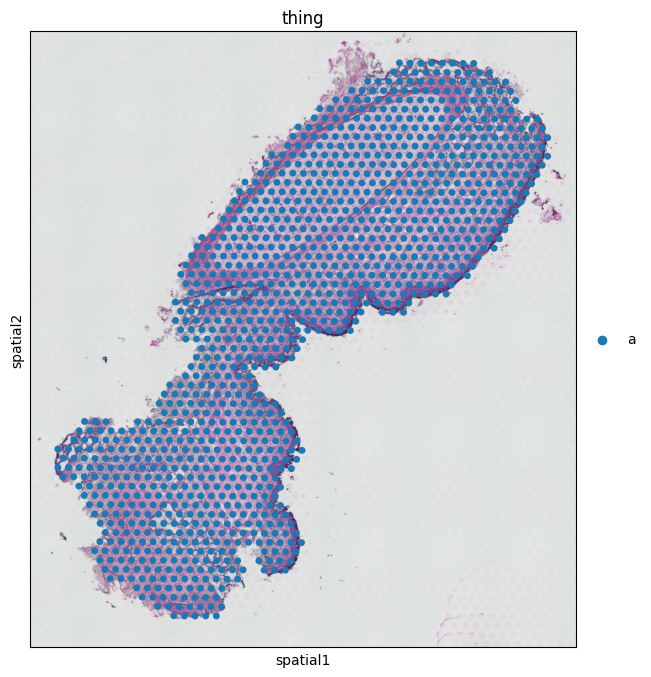

In [7]:
plt.rcParams['figure.figsize'] = (8,8)
sc.pl.spatial(adata,color='thing')

In [8]:
adata.var['mt'] = adata.var_names.str.startswith('MT-')
sc.pp.calculate_qc_metrics(adata, qc_vars=['mt'], inplace=True)

In [9]:
adata.obs

,in_tissue,array_row,array_col,thing,n_genes_by_counts,log1p_n_genes_by_counts,total_counts,log1p_total_counts,pct_counts_in_top_50_genes,pct_counts_in_top_100_genes,pct_counts_in_top_200_genes,pct_counts_in_top_500_genes,total_counts_mt,log1p_total_counts_mt,pct_counts_mt
AAACAGAGCGACTCCT-1,1,14,94,a,2265,7.725771,4567.0,8.426830,24.523757,33.873440,44.230348,59.054084,379.0,5.940171,8.298664
AAACAGGGTCTATATT-1,1,47,13,a,6792,8.823648,47816.0,10.775137,52.085076,58.927974,65.942362,73.142881,1505.0,7.317213,3.147482
AAACCGGGTAGGTACC-1,1,42,28,a,2418,7.791110,5088.0,8.534837,23.919025,31.741352,41.332547,56.721698,576.0,6.357842,11.320755
AAACCGTTCGTCCAGG-1,1,52,42,a,2743,7.917172,6143.0,8.723231,25.297086,32.801563,42.064138,56.649845,548.0,6.308098,8.920722
AAACTTGCAAACGTAT-1,1,45,19,a,2189,7.691657,6093.0,8.715060,38.634499,48.022321,57.557853,69.998359,573.0,6.352629,9.404235
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
TTGTTAGCAAATTCGA-1,1,22,42,a,1072,6.978214,1821.0,7.507690,26.633718,36.079077,48.709500,68.588688,97.0,4.584968,5.326744
TTGTTCAGTGTGCTAC-1,1,24,64,a,2034,7.618251,4157.0,8.332789,24.585037,33.894636,44.479192,61.029589,350.0,5.860786,8.419533
TTGTTTCACATCCAGG-1,1,58,42,a,4957,8.508758,20920.0,9.948508,48.723709,53.957935,59.756214,67.958891,3707.0,8.218248,17.719885
TTGTTTCATTAGTCTA-1,1,60,30,a,2076,7.638680,4469.0,8.405144,27.769076,36.249720,45.938689,61.691654,493.0,6.202536,11.031551


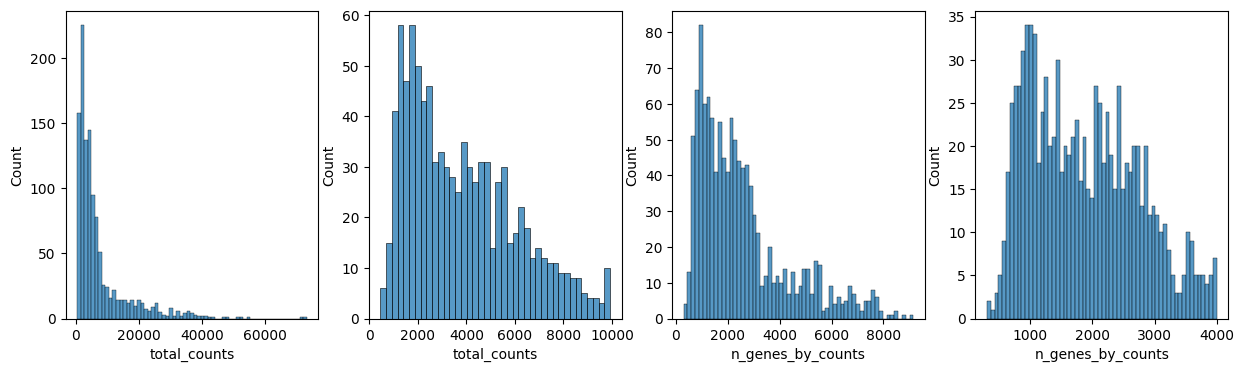

In [10]:

fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.histplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.histplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.histplot(adata.obs["n_genes_by_counts"], kde=False, bins=60, ax=axs[2])
sns.histplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=60, ax=axs[3])

plt.show()

<Axes: xlabel='total_counts', ylabel='Count'>

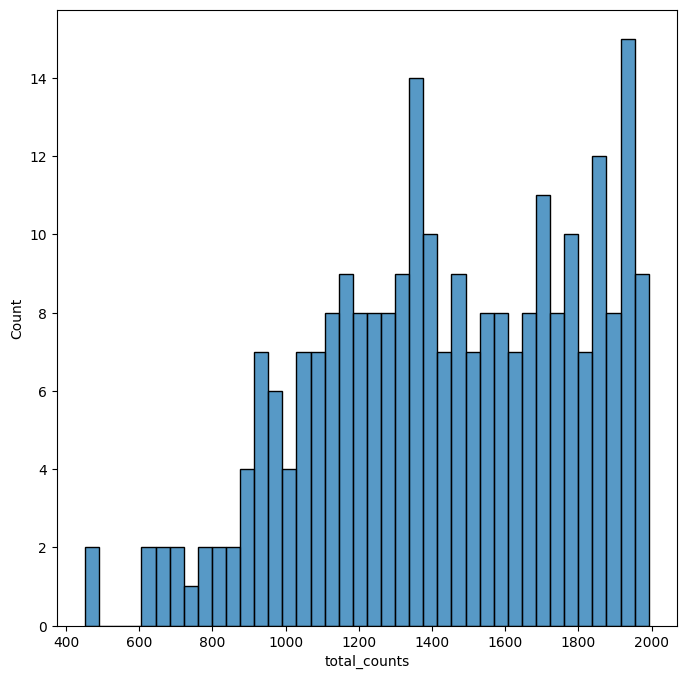

In [11]:
sns.histplot(adata.obs['total_counts'][adata.obs['total_counts'] < 2000], kde=False, bins = 40)

In [12]:
sc.pp.filter_cells(adata, min_counts= 1000)
sc.pp.filter_cells(adata, max_counts=35000)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/anndata/_core/anndata.py:1840: UserWarning: Variable names are not unique. To make them unique, call `.var_names_make_unique`.
  utils.warn_names_duplicates("var")


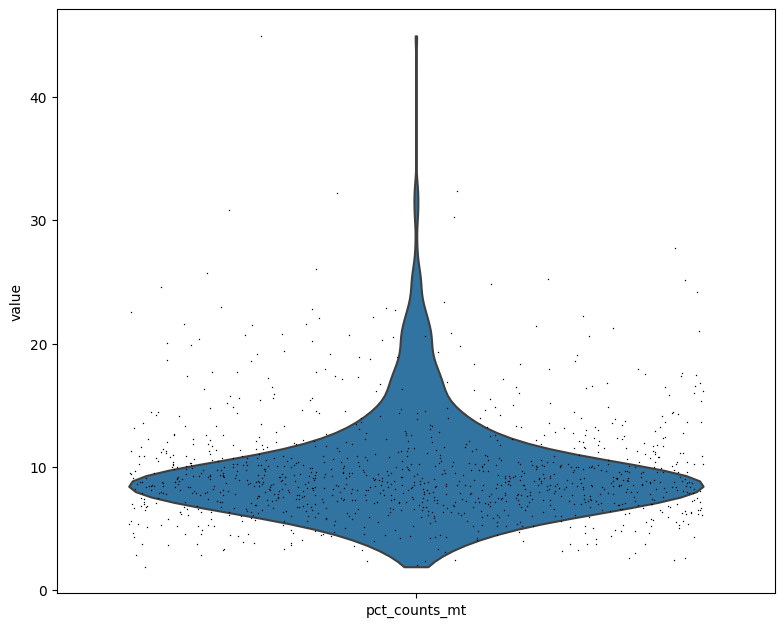

In [14]:
adata.var_names_make_unique()
sc.pl.violin(adata, ['pct_counts_mt'], jitter=0.4)

In [15]:
adata = adata[adata.obs['pct_counts_mt'] < 20]

sc.pp.filter_genes(adata, min_cells = 3)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/preprocessing/_simple.py:251: ImplicitModificationWarning: Trying to modify attribute `.var` of view, initializing view as actual.
  adata.var['n_cells'] = number


In [16]:
adata

AnnData object with n_obs × n_vars = 1075 × 18585
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

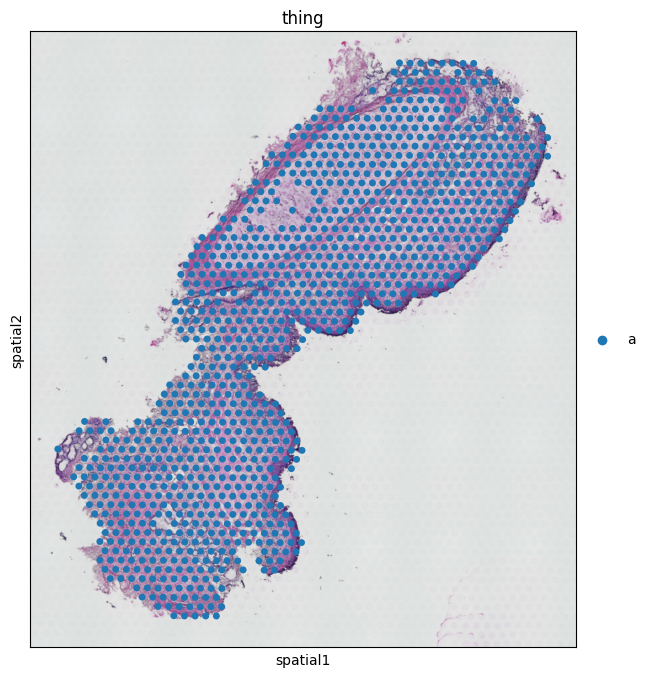

In [17]:
plt.rcParams['figure.figsize'] = (8,8)
sc.pl.spatial(adata, color = 'thing')

In [18]:
sc.pp.normalize_total(adata, inplace=True)

In [20]:
sc.pp.log1p(adata)

In [21]:
sc.pp.highly_variable_genes(adata, flavor = 'seurat', n_top_genes = 2000)

In [23]:
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/Library/Frameworks/Python.framework/V

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


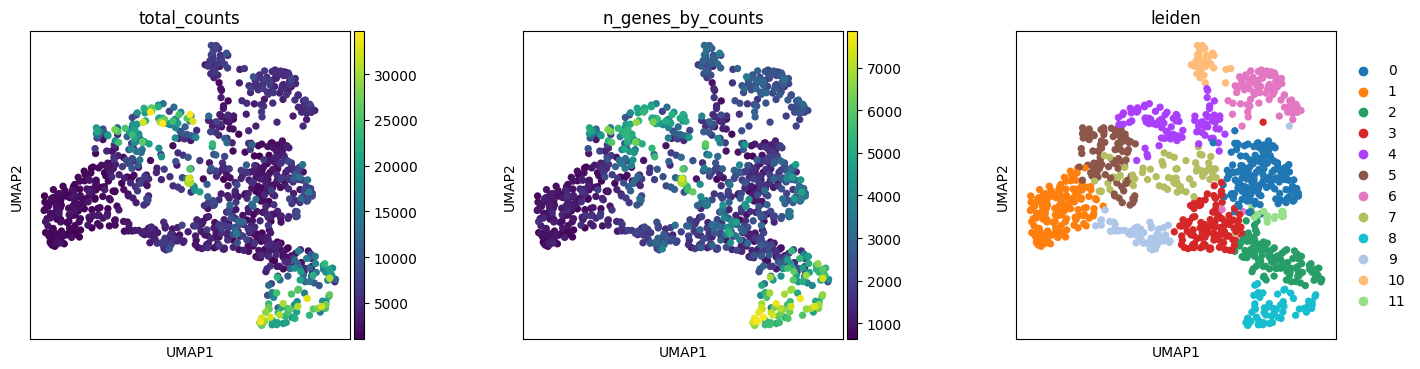

In [25]:
plt.rcParams['figure.figsize'] = (4,4)
sc.pl.umap(adata, color = ['total_counts', 'n_genes_by_counts', 'leiden'], wspace =0.4 )

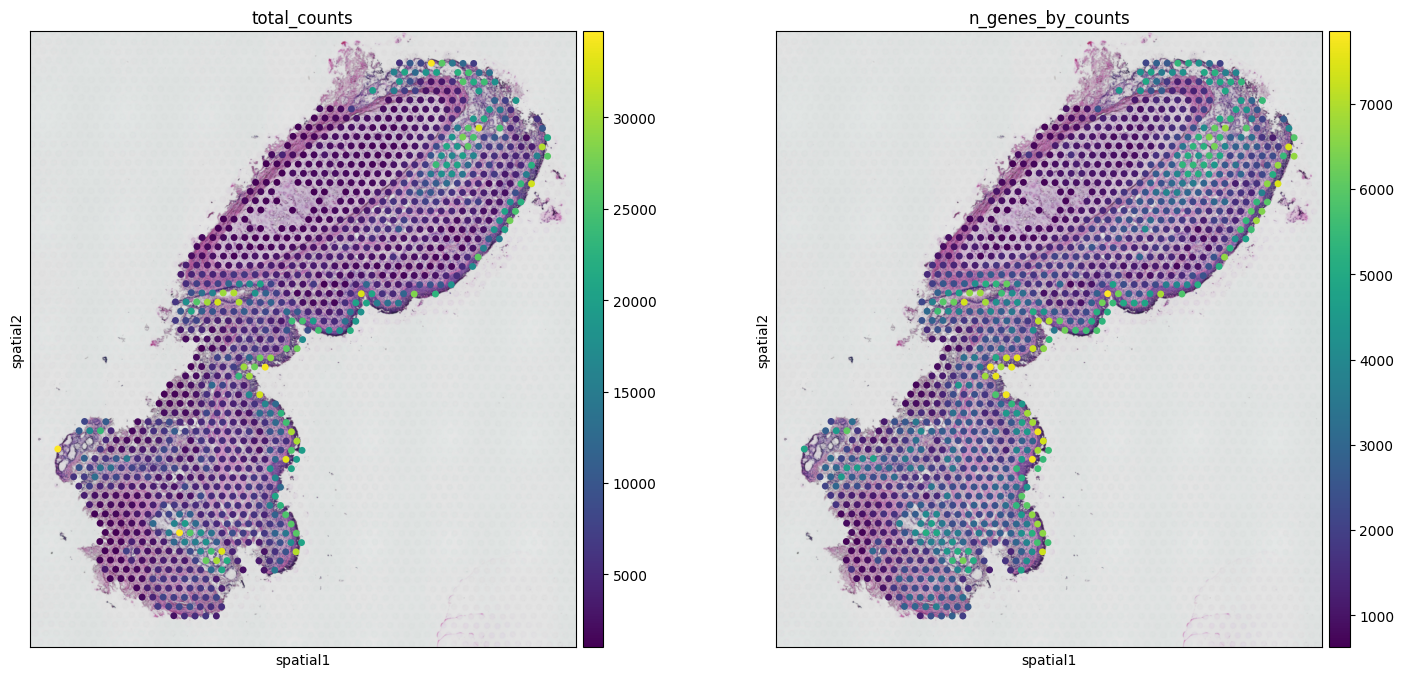

In [26]:
plt.rcParams['figure.figsize'] = (8,8)
sc.pl.spatial(adata, img_key ='hires', color=['total_counts', 'n_genes_by_counts'])

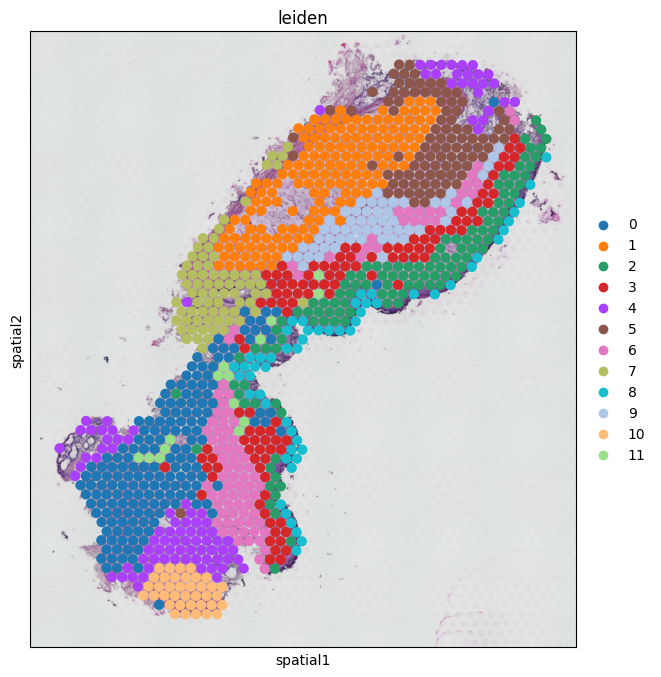

In [27]:
sc.pl.spatial(adata, img_key ='hires', color = 'leiden', size =1.5)

In [28]:
sc.tl.rank_genes_groups(adata, 'leiden', method='wilcoxon')


In [29]:
#convert to dataframe
results = adata.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

out = np.array([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np.vstack((out, np.vstack((results['names'][group],
                                     results['scores'][group],
                                     results['pvals_adj'][group],
                                     results['logfoldchanges'][group],
                                     np.array([group] * len(results['names'][group])).astype('object'))).T))



markers = pd.DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])

markers = markers[(markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]

In [30]:
markers

,Gene,scores,pval_adj,lfc,cluster
0,IGHG4,13.5843,0.0,2.613961,0
1,IGHG3,13.563314,0.0,2.365269,0
2,CFD,11.546929,0.0,1.67243,0
3,PLVAP,10.857469,0.0,1.979098,0
4,HLA-E,10.816433,0.0,1.078568,0
...,...,...,...,...,...
204441,PMP22,4.767481,0.004953,2.609907,11
204442,MPZ,4.698387,0.006092,5.609031,11
204443,CALM2,4.563968,0.009385,1.54417,11
204444,USP53,4.562712,0.009385,2.498558,11


In [31]:
markers[markers.cluster == '2']


,Gene,scores,pval_adj,lfc,cluster
37170,S100A2,13.602715,0.0,3.002661,2
37171,KRT15,12.814793,0.0,2.794214,2
37173,KRT19,12.465713,0.0,2.044274,2
37174,PABPC1,12.198006,0.0,1.055329,2
37175,AQP3,12.172834,0.0,2.661896,2
...,...,...,...,...,...
55750,CLU,-11.613673,0.0,-1.985112,2
55751,GPX3,-11.627446,0.0,-2.139345,2
55752,SERPING1,-12.179958,0.0,-2.447316,2
55753,DCN,-12.619118,0.0,-2.407895,2


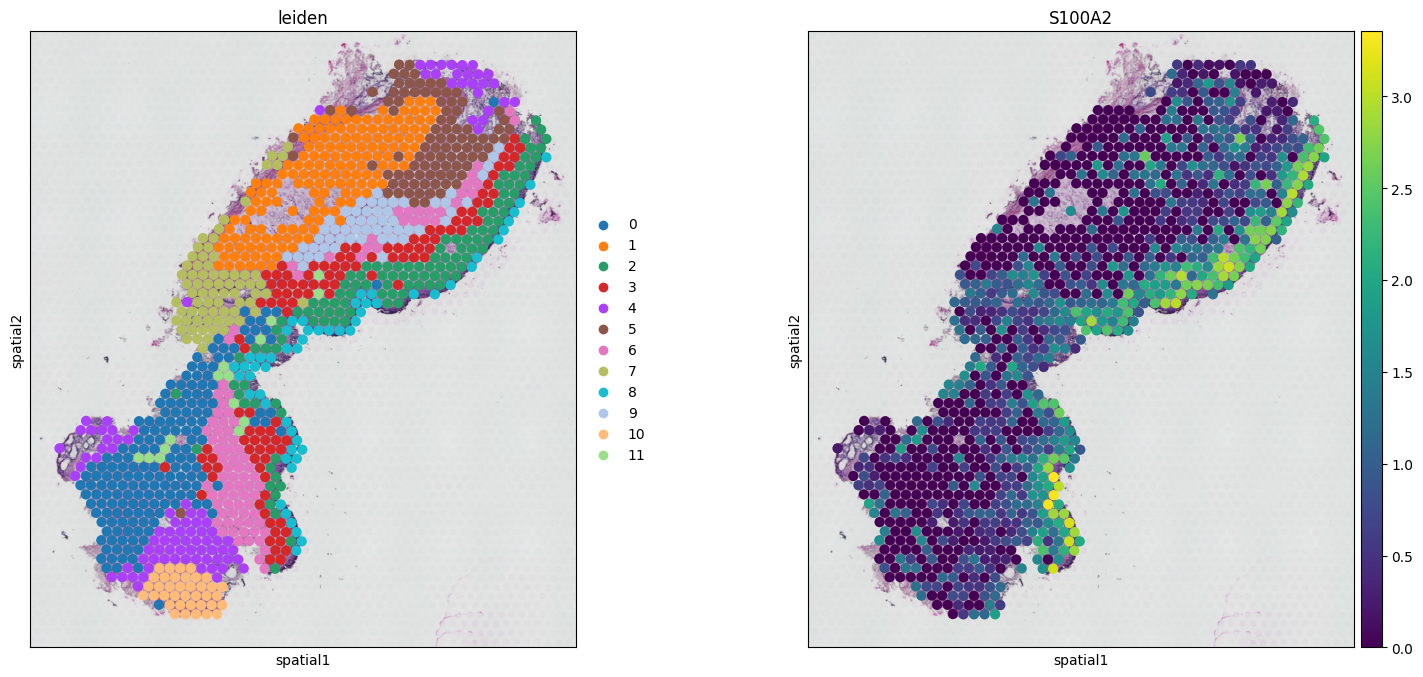

In [32]:
sc.pl.spatial(adata, img_key="hires", color=["leiden", "S100A2"], size=1.5,)
